In [1]:
%cd ..
import numpy as np
import pandas as pd

/home/cole/Documents/BDS/bds-final-project


In [2]:
from src.fetch import fetch_restaurant_inspection_data

i1 = fetch_restaurant_inspection_data(new_set=False)
i2 = fetch_restaurant_inspection_data(new_set=True)

/home/cole/Documents/BDS/bds-final-project/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
camis1 = list(i1.camis.unique())
camis2 = list(i2.camis.unique())
closed = [c for c in camis1 if c not in camis2]

In [4]:
i1.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zip', 'phone',
       'cuisine_description', 'critical_flag', 'score', 'grade', 'is_closed',
       'violation_count', 'inspection_year', 'inspection_month',
       'inspection_day', 'total_inspections', 'violation_ratio'],
      dtype='object')

In [5]:
i1['is_closed'] = np.where(i1['camis'].isin(closed), 1, i1['is_closed'])

In [6]:
sum(i1.is_closed) / len(i1)

0.10475934184222667

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# i1.cuisine_description = LabelEncoder().fit_transform(i1.cuisine_description)

i1_pca = i1.dropna()
i1_is_closed = i1_pca.is_closed

i1_pca = i1_pca.drop(['dba', 'boro', 'building', 'street', 'phone', 'camis', 
                      'is_closed', 'inspection_day', 'inspection_year', 'inspection_month'], 1)

p = PCA(n_components=3)

i1_proj = p.fit_transform(i1_pca.dropna())

/home/cole/Documents/BDS/bds-final-project/venv/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


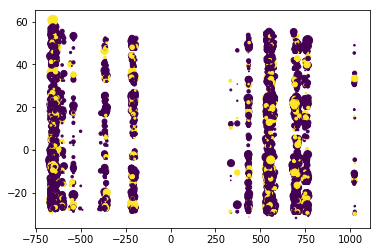

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(i1_proj[:,0], i1_proj[:,1], i1_proj[:,2], c=i1_is_closed)

In [21]:
i1_pca['is_closed'] = i1_is_closed

In [22]:
i1_pca.corr()

,zip,cuisine_description,critical_flag,score,grade,violation_count,total_inspections,violation_ratio,is_closed
zip,1.000000,0.036982,0.012456,0.012944,-0.014241,0.013678,0.016638,-0.013216,-0.040952
cuisine_description,0.036982,1.000000,0.051787,0.061627,-0.045424,0.045425,0.045232,0.020951,-0.023184
critical_flag,0.012456,0.051787,1.000000,0.640059,-0.544126,0.962015,0.962327,-0.022775,0.066102
score,0.012944,0.061627,0.640059,1.000000,-0.491202,0.603438,0.607867,-0.020494,0.029001
grade,-0.014241,-0.045424,-0.544126,-0.491202,1.000000,-0.519731,-0.525445,0.065615,-0.014839
violation_count,0.013678,0.045425,0.962015,0.603438,-0.519731,1.000000,0.997729,-0.002612,0.076618
total_inspections,0.016638,0.045232,0.962327,0.607867,-0.525445,0.997729,1.000000,-0.048220,0.075764
violation_ratio,-0.013216,0.020951,-0.022775,-0.020494,0.065615,-0.002612,-0.048220,1.000000,0.015376
is_closed,-0.040952,-0.023184,0.066102,0.029001,-0.014839,0.076618,0.075764,0.015376,1.000000
